In [1]:
import gym
from tensorflow import keras
from tensorflow.keras.optimizers.legacy import Adam
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory
import matplotlib.pyplot as plt
#from keras.metrics import AUC

import numpy as np

from env.env import KeibaEnv


# ゲーム環境を作成します
env = KeibaEnv(
    [
        "./../data/train/2003_train_binary.csv",
        "./../data/train/2004_train_binary.csv",
        "./../data/train/2005_train_binary.csv",
        "./../data/train/2006_train_binary.csv",
        "./../data/train/2007_train_binary.csv",
        "./../data/train/2008_train_binary.csv",
        "./../data/train/2009_train_binary.csv",
        "./../data/train/2010_train_binary.csv",
        "./../data/train/2011_train_binary.csv",
        "./../data/train/2012_train_binary.csv",
    ],
    [
        "./../data/train/2003_result_wide.csv",
        "./../data/train/2004_result_wide.csv",
        "./../data/train/2005_result_wide.csv",
        "./../data/train/2006_result_wide.csv",
        "./../data/train/2007_result_wide.csv",
        "./../data/train/2008_result_wide.csv",
        "./../data/train/2009_result_wide.csv",
        "./../data/train/2010_result_wide.csv",
        "./../data/train/2011_result_wide.csv",
        "./../data/train/2012_result_wide.csv",
    ]
)

# ゲーム環境を初期化します。
observation = env.reset()

# 環境からアクション数を取得します。このゲームでは4となります。
nb_actions = env.action_space.n

try:
    model = keras.models.load_model('./../model/binary_model_wide')
except:
    print("create")
    # Kerasを使ってモデルを作成します。
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(1,) + env.observation_space.shape),
        keras.layers.Dense(128, activation="elu"),
        keras.layers.Dense(128, activation='elu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(128, activation='elu'),
        keras.layers.Dense(128, activation='elu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(nb_actions, activation="linear"),
    ])

model.summary()
    
# 経験値を蓄積するためのメモリです。学習を安定させるために使用します。
memory = SequentialMemory(limit=50000, window_length=1)

# 行動ポリシーはBoltzmannQPolicyを使用しています。
# EpsGreedyQPolicyと比較して、こちらの方が収束が早かったので採用しています。
policy = EpsGreedyQPolicy()

# DQNAgentを作成します。
dqn = DQNAgent(
    model=model,
    nb_actions=nb_actions,
    memory=memory,
    target_model_update=1e-2,
    policy=policy)

# DQNAgentのコンパイル。最適化はAdam,評価関数はMAEを使用します。
dqn.compile(Adam(learning_rate=1e-5), metrics=[
    keras.losses.BinaryCrossentropy(from_logits=True, name='binary_crossentropy'), 'accuracy'
])

# 学習開始
history = dqn.fit(env, nb_steps=10000000, visualize=False, log_interval=34462, verbose=1)



RANK_ONE_TWO_HORSE            :              0円 的中率 0.00%    回収率 0.00%    (0/0)
RANK_ONE_THREE_HORSE          :              0円 的中率 0.00%    回収率 0.00%    (0/0)
RANK_ONE_FOUR_HORSE           :              0円 的中率 0.00%    回収率 0.00%    (0/0)
RANK_ONE_FIVE_HORSE           :              0円 的中率 0.00%    回収率 0.00%    (0/0)
RANK_TWO_THREE_HORSE          :              0円 的中率 0.00%    回収率 0.00%    (0/0)
RANK_TWO_FOUR_HORSE           :              0円 的中率 0.00%    回収率 0.00%    (0/0)
NO_ACITON                     :              0円 的中率 0.00%    回収率 0.00%    (0/0)
TOTAL                         :              0円 的中率 0.00%    回収率 0.00%    (0/0)
create
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 40)                0         
                                                              

C:\Users\kazuy\anaconda3\envs\keiba_ai_learning2\lib\site-packages\keras\engine\training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 1000/34462 [..............................] - ETA: 2:33 - reward: -0.8700

C:\Users\kazuy\anaconda3\envs\keiba_ai_learning2\lib\site-packages\keras\engine\training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


34462/34462 [==============================] - 290s 8ms/step - reward: -0.8016

RANK_ONE_TWO_HORSE            :        -862300円 的中率 13.03%   回収率 -11.17%  (1006/7720)
RANK_ONE_THREE_HORSE          :       -1244800円 的中率 11.59%   回収率 -25.44%  (567/4894)
RANK_ONE_FOUR_HORSE           :        -786500円 的中率 10.51%   回収率 -12.68%  (652/6205)
RANK_ONE_FIVE_HORSE           :       -1221700円 的中率 10.16%   回収率 -30.44%  (408/4014)
RANK_TWO_THREE_HORSE          :       -1355600円 的中率 7.33%    回収率 -28.13%  (353/4819)
RANK_TWO_FOUR_HORSE           :        -343500円 的中率 9.39%    回収率 -7.46%   (432/4603)
NO_ACITON                     :              0円 的中率 0.00%    回収率 0.00%    (0/2207)
TOTAL                         :       -8021400円 的中率 9.92%    回収率 -23.28%  (3418/34462)
1 episodes - episode_reward: -27626.000 [-27626.000, -27626.000] - loss: 1.775 - binary_crossentropy: -24.608 - accuracy: 0.146 - mean_q: -9.638

Interval 2 (34462 steps performed)
14828/34462 [===========>..................] - ETA: 2:51 -

INFO:tensorflow:Assets written to: ./../model/binary_model_wide\assets
[-27626.0]


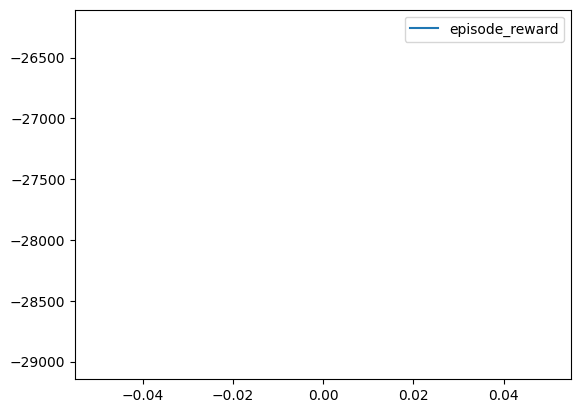

In [2]:
# 学習した重みをファイルに保存します。
#dqn.save_weights('./../model/moving_test.hdf5', overwrite=True)

# 学習したモデルを保存
model.save("./../model/binary_model_wide")
print(history.history['episode_reward'])

# ゲームごとのステップ数と報酬をグラフ化します。
#plt.plot(history.history['nb_episode_steps'], label='nb_episode_steps')
plt.plot(history.history['episode_reward'], label='episode_reward')
plt.legend()
plt.show()